In [54]:
%matplotlib inline 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
df = pd.read_csv('Student Profiles Wrangled.csv')

In [55]:
Course_Code = pd.read_excel('Data and metadata/Course Codes.xlsx')
Student = pd.read_excel('Data and metadata/Student Profiles.xlsx')

In [56]:
Student.drop(columns=['FULL-TIME OR PART-TIME'])

,STUDENT ID,SALUTATION,GENDER,NATIONALITY,LOCAL,FOREIGN,DOB,HIGHEST QUALIFICATION,NAME OF QUALIFICATION AND INSTITUTION,DATE ATTAINED HIGHEST QUALIFICATION,DESIGNATION,INTAKE NO,COMMENCEMENT DATE,COMPLETION DATE,COURSE FUNDING,REGISTRATION FEE,PAYMENT MODE,COURSE FEE,GPA
0,2020/1101-013/001,Ms,F,Singaporean,Y,,04/03/1978,Certificate,"Certificate in Office Skills, ITE",2016-11-06,"Snr Associate, Client Services",13th,2020-01-06,2021-04-06 00:00:00,Individual - SFC,107,NETS,1712,3.0
1,2020/1101-013/002,Ms,F,Singaporean,Y,,23/03/1966,Certificate,"WSQ Higher Certificate in Human Resources, WPL...",2018-02-06,Admin Officer,13th,2020-01-06,2021-04-06 00:00:00,Individual,107,NETS,1712,2.5
2,2020/1101-013/003,Ms,F,Singaporean,Y,NaN,04/12/1988,Certificate,"Nitec in Service Skills (Office), ITE",2016-11-06,Admin Assistant,13th,2020-01-06,2021-04-06 00:00:00,Sponsored - no SDF,107,CC JPM,1712,2.0
3,2020/1101-014/004,Ms,F,Singaporean,Y,NaN,27/11/1991,Degree,Bachelor Science (Facilities & Events Manageme...,2017-06-10,HR Administrator,14th,2020-03-10,2021-06-09 00:00:00,Individual - SFC,107,NETS,1212,2.5
4,2020/1101-014/005,Ms,F,Singaporean,Y,,23/04/1985,Diploma,"Diploma in Procurement and Supply Management, ...",2016-08-10,Purchasing Executive,14th,2020-03-10,2021-06-09 00:00:00,Individual - SFC,107,NETS,1712,2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,2019/5113-007/005,Ms,F,Singaporean,Y,NaN,01/10/1973,Degree,Bachelor of Commerce (Accounting and Finance)/...,2017-11-05,"Head, Registry & Corp Admin",7th,2019-07-05,2020-01-04 00:00:00,Individual,107,Nets,5803,2.9
240,2019/5113-007/006,Ms,F,Indonesian (PR),Y,NaN,30/09/1982,Degree,Bachelor of Economics (Accounting)/\nUniversit...,2016-05-05,Finance Officer,7th,2019-07-05,2020-01-04 00:00:00,Individual,107,Nets,5803,2.0
241,2019/5113-006/003,Ms,F,Singaporean,Y,NaN,06/03/1990,Degree,Bachelor of Science in Hotel Administration (H...,2015-06-08,HR Assistant,6th,2019-03-08,2019-09-07 00:00:00,Individual,107,Nets,5803,2.8
242,2019/5113-005/001,Ms,F,Singaporean,Y,NaN,14/11/1981,Degree,Bachelor of Arts with Second Class Honours (Lo...,2014-08-04,Household Goods Coordinator,5th,2019-01-04,2019-07-03 00:00:00,Individual,107,Nets,5803,1.9


In [57]:
Student.describe(include='object')

,STUDENT ID,SALUTATION,GENDER,NATIONALITY,LOCAL,FOREIGN,DOB,HIGHEST QUALIFICATION,NAME OF QUALIFICATION AND INSTITUTION,DESIGNATION,INTAKE NO,COMPLETION DATE,FULL-TIME OR PART-TIME,COURSE FUNDING,REGISTRATION FEE,PAYMENT MODE
count,244,244,244,244,229,120,244,244,244,244,244,244,244,244,244,244
unique,244,4,2,19,2,2,236,8,210,147,28,34,1,17,3,23
top,2020/1101-013/001,Ms,F,Singaporean,Y,,30/11/1983,Degree,O' level,-,70th,20/09/2019,Part-Time,Individual,107,Nets
freq,1,214,215,189,205,81,2,104,10,36,21,21,244,112,239,169


In [58]:
Student.describe()

,COURSE FEE,GPA
count,244.000000,244.000000
mean,2687.856557,2.758197
std,1825.495950,0.595987
min,888.000000,1.500000
25%,1388.000000,2.300000
50%,1712.000000,2.800000
75%,2996.000000,3.100000
max,5803.000000,4.000000


In [59]:
Student['CITIZENSHIP_STATUS'] = ''
Student.loc[Student['LOCAL'] == 'Y', 'CITIZENSHIP_STATUS'] = 'L'
Student.loc[Student['FOREIGN'] == 'Y', 'CITIZENSHIP_STATUS'] = 'F'
Student.drop(['FOREIGN', 'LOCAL'], axis=1, inplace=True)

In [60]:
missing_values = Student.isnull().sum()
print('Looking for Missing Values:')
print(missing_values)

Looking for Missing Values:
STUDENT ID                               0
SALUTATION                               0
GENDER                                   0
NATIONALITY                              0
DOB                                      0
HIGHEST QUALIFICATION                    0
NAME OF QUALIFICATION AND INSTITUTION    0
DATE ATTAINED HIGHEST QUALIFICATION      0
DESIGNATION                              0
INTAKE NO                                0
COMMENCEMENT DATE                        0
COMPLETION DATE                          0
FULL-TIME OR PART-TIME                   0
COURSE FUNDING                           0
REGISTRATION FEE                         0
PAYMENT MODE                             0
COURSE FEE                               0
GPA                                      0
CITIZENSHIP_STATUS                       0
dtype: int64


In [61]:
Student.loc[Student['HIGHEST QUALIFICATION'].isin(['Postgraduate Diploma','Postgraduate Diploma/\nDegree']), 'HIGHEST QUALIFICATION'] = 'Master'
Student.loc[Student['HIGHEST QUALIFICATION'] == ' ', 'HIGHEST QUALIFICATION'] = 'No Qualifications'

In [62]:
Student.loc[~Student['PAYMENT MODE'].isin(['NETS', 'GIRO', 'Giro', 'Cr Card']), 'PAYMENT MODE'] = 'Bank Transfer'
Student['PAYMENT MODE'] = Student['PAYMENT MODE'].str.replace('Giro', 'GIRO')

In [63]:
Student['SALUTATION'] = Student['SALUTATION'].str.replace('Mr ', 'Mr')

In [64]:
Student['COMPLETION DATE'] = Student['COMPLETION DATE'].astype('datetime64[ns]')

f:\anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '21/09/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
f:\anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '20/11/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
f:\anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '22/01/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
f:\anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '15/04/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

In [65]:
Student['DOB'] = pd.to_datetime(Student['DOB'], infer_datetime_format=True)
Student['DOB'] = Student['DOB'].astype('datetime64[ns]')

C:\Users\Rejey Ezekiel\AppData\Local\Temp\ipykernel_10792\4085476512.py:1: UserWarning: Parsing '23/03/1966' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  Student['DOB'] = pd.to_datetime(Student['DOB'], infer_datetime_format=True)
C:\Users\Rejey Ezekiel\AppData\Local\Temp\ipykernel_10792\4085476512.py:1: UserWarning: Parsing '27/11/1991' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  Student['DOB'] = pd.to_datetime(Student['DOB'], infer_datetime_format=True)
C:\Users\Rejey Ezekiel\AppData\Local\Temp\ipykernel_10792\4085476512.py:1: UserWarning: Parsing '23/04/1985' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  Student['DOB'] = pd.to_datetime(Student['DOB'], infer_datetime_format=True)
C:\Users\Rejey Ezekiel\AppData\Local\Temp\ipykernel_10792\4085476512.py:1: UserWarning: Parsing '15/03/1981' in DD/MM/YYYY format. Provide for

In [66]:
Student.loc[Student['REGISTRATION FEE'] == '107\n107','REGISTRATION FEE'] = 107
Student.loc[Student['REGISTRATION FEE'] == 'Waived','REGISTRATION FEE'] = 0

In [67]:
Student.loc[Student['COURSE FUNDING'].isin(['Individual','Individual   ','Individual ', 'Indivodual','Individual  ','Individual - SFC + $1000 SCHOLARSHIP', 'Individual - waived App Fee']), 'COURSE FUNDING'] = 'Individual'
Student.loc[Student['COURSE FUNDING'].isin(['Sponsored','Sponsored ', 'Sponsored  ','Sponsored   ','Sponsored - no SDF','Sponsored-no SDF','Sponsored - SDF', 'Sponsored - no SDF', 'Sponsored-no SDF']), 'COURSE FUNDING'] = 'Sponsored'
Student.loc[Student['COURSE FUNDING'].isin(['Individual - SFC','Individual-SFC','Indvidual - SFC']), 'COURSE FUNDING'] = 'Subsidiesed'

In [68]:
Student['INTAKE NO'] = Student['INTAKE NO'].str.replace('rd', 'th')

In [69]:
Student.loc[Student['NAME OF QUALIFICATION AND INSTITUTION'].isin([' ','-', ]), 'NAME OF QUALIFICATION AND INSTITUTION'] = 'Unknown Institution / Qualification'

In [70]:
Student['DESIGNATION'] = Student['DESIGNATION'].str.rstrip()
Student.loc[Student['DESIGNATION'] == '-','DESIGNATION'] = 'No Designation'

In [71]:
Student['NATIONALITY'] = Student['NATIONALITY'].str.strip().str.replace('\n', ' ').str.replace('  ', ' ')
Student.loc[Student['NATIONALITY'] == 'Malaysian(PR)','NATIONALITY'] = 'Malaysian (PR)'

In [72]:
Student.loc[Student['NATIONALITY'].str.contains('PR', case=False), 'NATIONALITY'] = 'Permanent Resident'
Student.loc[~Student['NATIONALITY'].isin(['Singaporean','Permanent Resident']), 'NATIONALITY'] = 'Foreigner'


In [73]:
def check_and_swap_dates(row):
    if row['COMPLETION DATE'] < row['COMMENCEMENT DATE']:
        row['COMMENCEMENT DATE'], row['COMPLETION DATE'] = row['COMPLETION DATE'], row['COMMENCEMENT DATE']
    return row

# Apply the function to each row
Student = Student.apply(check_and_swap_dates, axis=1)

In [74]:
Student['date_diff'] = (Student['COMPLETION DATE'] - Student['COMMENCEMENT DATE']).dt.days

In [75]:
Student['COURSE'] = Student['STUDENT ID'].str.extract(r'/(?P<COURSE>\d{4})')

In [76]:
import datetime

# Calculate the current date
current_date = datetime.datetime.now()

# Calculate the age by subtracting the DOB from the current date
Student['Age'] = (current_date - Student['DOB']).astype('<m8[Y]').astype(int)


In [77]:
Student.to_csv('Student Profiles Wrangled.csv', index=False)

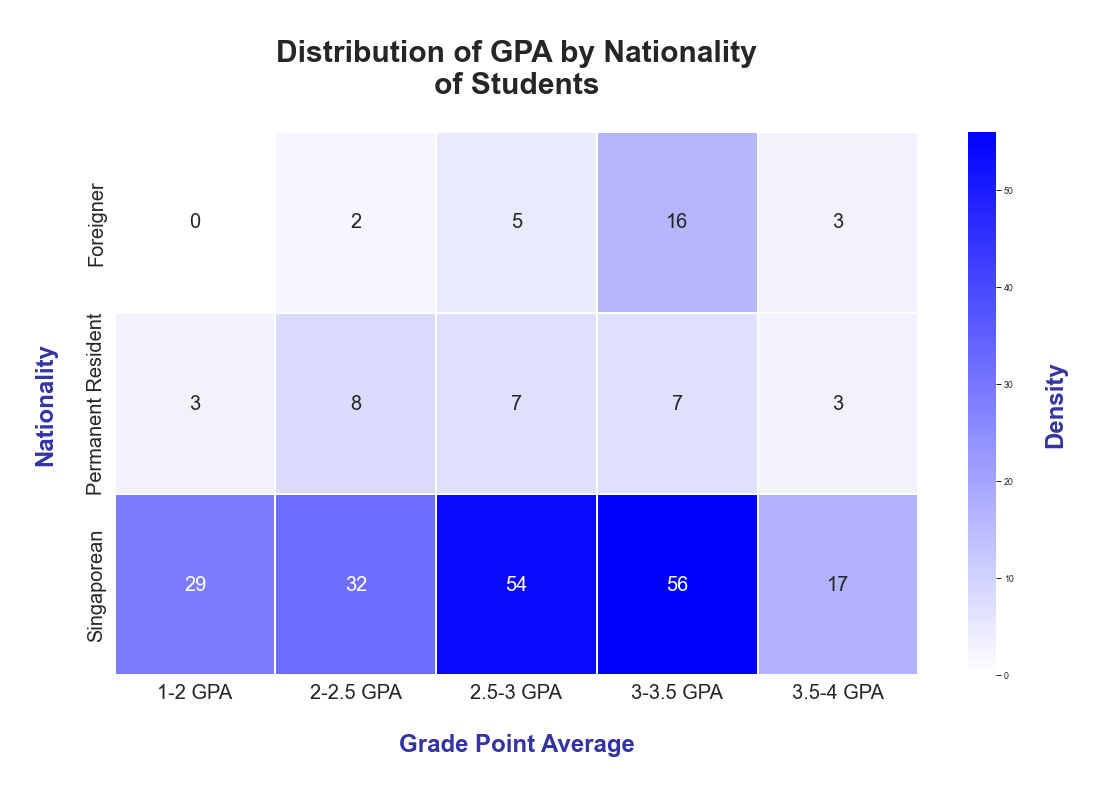

In [78]:
cmap = mcolors.LinearSegmentedColormap.from_list("white_to_blue", ["white", "blue"])

# Categorize GPA into 5 categories
gpa_bins = [1.0, 2.0, 2.5, 3.0, 3.5, 4.0]
gpa_labels = ['1-2 GPA', '2-2.5 GPA', '2.5-3 GPA', '3-3.5 GPA', '3.5-4 GPA']
df['GPA_Category'] = pd.cut(df['GPA'], bins=gpa_bins, labels=gpa_labels, right=False)

# Create a pivot table to count occurrences
pivot_table = df.pivot_table(index='NATIONALITY', columns='GPA_Category', aggfunc='size', fill_value=0)

sns.set_theme(context='paper', style='darkgrid', palette='ch:s=.45,rot=-.25', font='sans-serif')

plt.figure(figsize=(18, 10))

# Create the heatmap with annotations
heatmap = sns.heatmap(pivot_table, annot=True, fmt="d", cbar=True, linewidths=0.3, cmap=cmap, annot_kws={"size": 20})

# Manually set the GPA xticks
xtick_labels = pivot_table.columns
heatmap.set_xticklabels(xtick_labels)

# Adding a color bar
cbar = heatmap.collections[0].colorbar
cbar.set_label('\nDensity\n', fontsize=24, color='#00008b',weight='bold', alpha=0.8)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('\nGrade Point Average\n', fontsize=24, color='#00008b', weight='bold',alpha=0.8)
plt.ylabel('\nNationality\n', fontsize=24, color='#00008b', weight='bold', alpha=0.8)
plt.title('\nDistribution of GPA by Nationality\nof Students\n', fontsize=30, weight='bold')
plt.show()

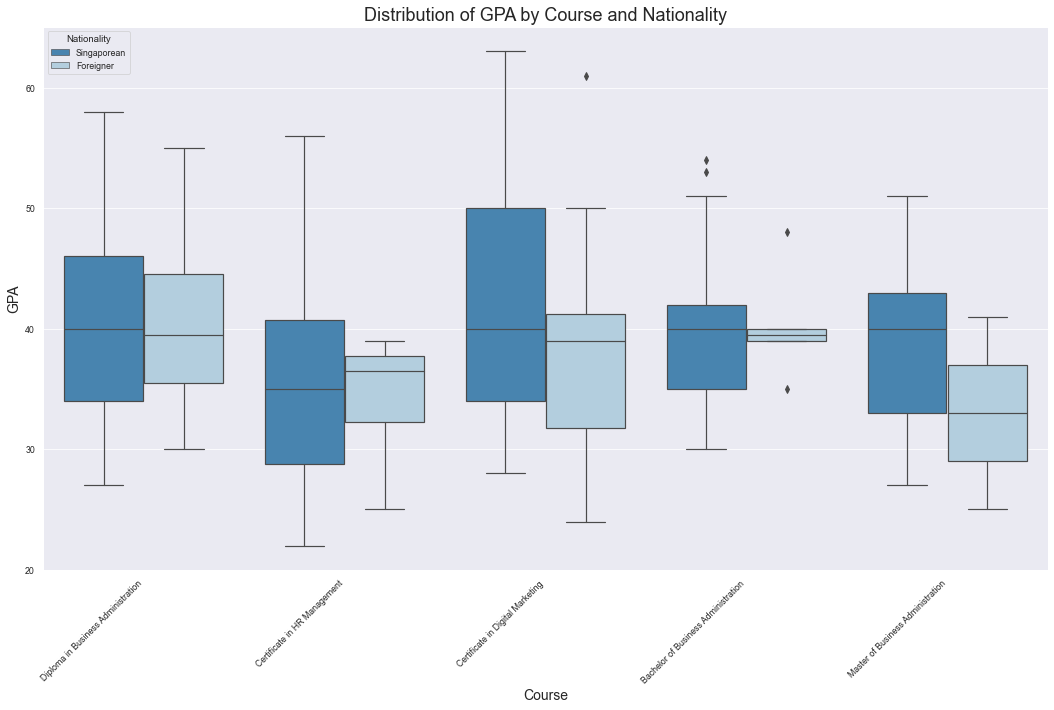

In [79]:
# Ensure 'COMPLETION DATE' is in datetime format
df['COMPLETION DATE'] = pd.to_datetime(df['COMPLETION DATE'])

# Mapping dictionary for COURSE values
course_mapping = {
    1101: 'Diploma in Business Administration',
    2101: 'Certificate in HR Management',
    2102: 'Certificate in Digital Marketing',
    5112: 'Bachelor of Business Administration',
    5113: 'Master of Business Administration'
}

# Update COURSE column with mapped names
df['COURSE'] = df['COURSE'].map(course_mapping)

df['NATIONALITY'] = df['NATIONALITY'].replace('Permanent Resident', 'Foreigner')
# Set the aesthetic style of the plots
sns.set_style("darkgrid")

# Define a color palette

# Plot: Box Plot with hue for nationality
plt.figure(figsize=(18, 10))
sns.boxplot(x='COURSE', y='Age', hue='NATIONALITY', data=df, palette='Blues_r')
plt.xlabel('Course', fontsize=14)
plt.ylabel('GPA', fontsize=14)
plt.title('Distribution of GPA by Course and Nationality', fontsize=18)
plt.legend(title='Nationality', loc='upper left')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

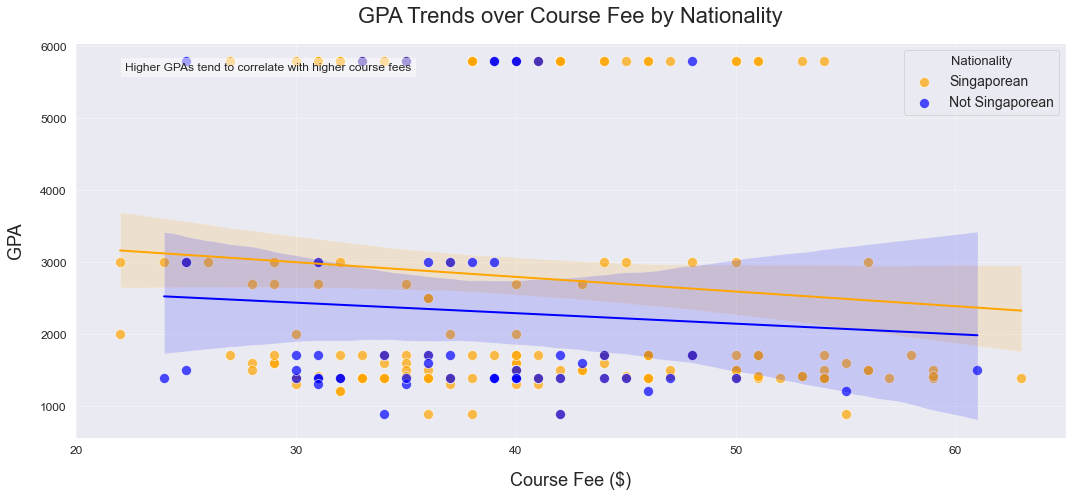

In [80]:
# Ensure 'COMPLETION DATE' is in datetime format
df['COMPLETION DATE'] = pd.to_datetime(df['COMPLETION DATE'])

# Separate the data by nationality
df_sg = df[df['NATIONALITY'] == 'Singaporean']
df_PR = df[(df['NATIONALITY'] == 'Permanent Resident') | (df['NATIONALITY'] == 'Foreigner')]

# Set the aesthetic style of the plots
sns.set_style("darkgrid")

# Create a figure and axis object
plt.figure(figsize=(15, 7))

# Scatter plot with regression line for Singaporean
sns.scatterplot(data=df_sg, x='Age', y='COURSE FEE', label='Singaporean', color='orange', s=100, edgecolor='w', alpha=0.7)
sns.regplot(data=df_sg, x='Age', y='COURSE FEE', scatter=False, color='orange', line_kws={'linewidth': 2})

# Scatter plot with regression line for Not Singaporean
sns.scatterplot(data=df_PR, x='Age', y='COURSE FEE', label='Not Singaporean', color='blue', s=100, edgecolor='w', alpha=0.7)
sns.regplot(data=df_PR, x='Age', y='COURSE FEE', scatter=False, color='blue', line_kws={'linewidth': 2})

# Customize the plot
plt.xlabel('Course Fee ($)', fontsize=18, labelpad=15)
plt.ylabel('GPA', fontsize=18, labelpad=15)
plt.title('GPA Trends over Course Fee by Nationality', fontsize=22, pad=20)

# Set x-axis intervals if needed
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Enhancements
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(loc='upper right', fontsize=14, title='Nationality', title_fontsize='13')

# Annotations for better clarity
plt.text(0.05, 0.95, 'Higher GPAs tend to correlate with higher course fees',
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

# Show the plot
plt.tight_layout()
plt.show()
